## 리포트 방향성
1. EDA
- airplane 데이터 100만 개 입니다.
해당 고객데이터를 시각화를 통한 인사이트를 정리해 주세요. 
Delay 에 따른 변수들의 시각화 필수입니다.

2. 통계분석
- 유의미한 컬럼별로 정규성 검정 부탁드립니다.
- 또한 상관계수등을 통한 변수간의 관계를 정리해 주세요.

3. 분석 모델링
Delay를 예측하는 모델링을 만들어 주세요.
분류 모델링 자유롭게 진행해 주시고 정확도 외에 f1스코어, precision, recall 등 모두 사용하여 최적의 모델링을 선정해 주세요.

단순 모델링만 하시면 안 되고 하이퍼파라미터 찾아보시고 간단한 튜닝들은 필수적으로 하셔야 합니다.

분석 리포팅은 그동안 배운 모든 과정을 한 번에 정리하는 시간입니다. 
충분히 고민하시고 하나씩 정리해 주시길 바랍니다.

## 패키지 불러오기

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##데이터 불러오기

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/airplane.csv')

In [ ]:
df

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,NaN,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,NaN
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,NaN,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,NaN
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,NaN,HOU,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,NaN
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,ATL,10397,NaN,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,NaN


### 데이터 설명
- 1,000,000개의 데이터
- ID : 샘플 고유 id
>항공편 운항 관련 정보
- Month: 해당 항공편의 출발 월
- Day_of_Month: Month에 해당하는 월의 날짜
- Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (HH:MM 형식)
- Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (HH:MM 형식)
- Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
- Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
- Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
- Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
- Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
- Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
- Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
- Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
- Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
- Airline: 해당 항공편을 운항하는 항공사
- Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 
(IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
- Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
- Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
>예측해야 하는 타깃
- Delay: 항공편 지연 여부 (Not_Delayed, Delayed)

## 데이터 결측치, 통계량 파악

In [ ]:
df.describe()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT)
count,1000000.000000,1000000.000000,890981.000000,890960.000000,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.000000,891003.000000
mean,6.945156,15.764842,1341.153019,1493.295934,0.0,0.0,12696.278484,12701.813986,784.078499,19997.388093
std,3.462506,8.763515,489.814011,520.803494,0.0,0.0,1514.938441,1515.213044,590.790469,404.268639
min,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10135.000000,10135.000000,16.000000,19393.000000
25%,4.000000,8.000000,925.000000,1105.000000,0.0,0.0,11292.000000,11292.000000,350.000000,19790.000000
50%,7.000000,16.000000,1332.000000,1524.000000,0.0,0.0,12889.000000,12889.000000,623.000000,19977.000000
75%,10.000000,23.000000,1742.000000,1924.000000,0.0,0.0,14057.000000,14057.000000,1020.000000,20378.000000
max,12.000000,31.000000,2359.000000,2400.000000,0.0,0.0,16869.000000,16869.000000,5095.000000,21171.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

In [ ]:
cate_cols = ['ID', 'Origin_Airport', 'Cancelled', 'Diverted', 'Origin_State', 'Destination_Airport', 'Airline', 'Carrier_Code(IATA)', 'Tail_Number', 'Delay']

for col in cate_cols:
  print(df[col].value_counts())
  print('\n')

TRAIN_000000    1
TRAIN_666657    1
TRAIN_666659    1
TRAIN_666660    1
TRAIN_666661    1
               ..
TRAIN_333337    1
TRAIN_333338    1
TRAIN_333339    1
TRAIN_333340    1
TRAIN_999999    1
Name: ID, Length: 1000000, dtype: int64


ORD    50436
ATL    44140
DEN    40300
LAX    31825
DFW    30879
       ...  
ADK       14
GST       13
DLG        9
AKN        8
BFM        6
Name: Origin_Airport, Length: 374, dtype: int64


0    1000000
Name: Cancelled, dtype: int64


0    1000000
Name: Diverted, dtype: int64


California                                        103482
Texas                                              89074
Florida                                            66426
Illinois                                           58765
New York                                           43613
Georgia                                            42244
Colorado                                           39795
North Carolina                                     35411
Virginia              

array([[<Axes: title={'center': 'Cancelled'}>,
        <Axes: title={'center': 'Diverted'}>]], dtype=object)

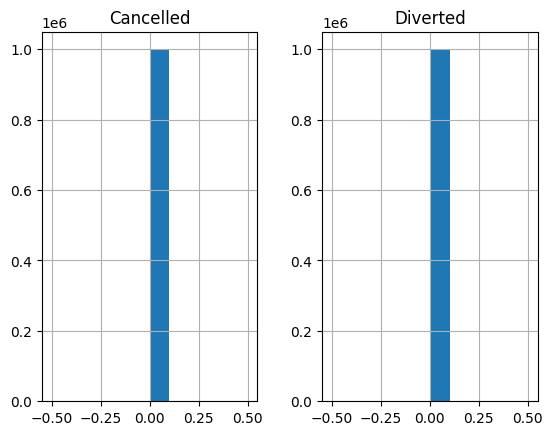

In [ ]:
df[['Cancelled', 'Diverted']].hist()

- ID 
- Cancelled : 0과 1로 분류되어 있다고 했지만 모든 value가 0으로 할당되어 있음
- Diverted : 'Cancelled'와 마찬가지로 모든 value가 0으로 할당되어 있음
- 따라서, 세개의 컬럼은 예측에 도움이 되지 않으므로 삭제

In [ ]:
df_1 = df.drop(columns = ['ID', 'Cancelled', 'Diverted'])

#### 결측치가 존재하는 컬럼 
- 'Estimated_Departure_Time'
- 'Estimated_Arrival_Time'
- 'Origin_State'
- 'Destination_State'
- 'Airline'
- 'Carrier_Code(IATA)'
- 'Carrier_ID(DOT)'

In [ ]:
na_col = ['Estimated_Departure_Time', 'Estimated_Arrival_Time', 'Origin_State', 'Destination_State', 'Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']

In [ ]:
df_2 = df_1.dropna(subset = na_col)
df_2.shape

(445713, 16)

In [ ]:
df_2['Delay'].isna().sum()

331926

- 결측치가 하나라도 존재하는 행을 모두 삭제하니 데이터가 절반이하로 줄어듬
- 심지어, target인 'Delay'에서는 445713개 중 331926개가 결측치임
- 따라서 각 컬럼을 보며 결측치를 채워넣을 수 있는 방법을 탐구

In [ ]:
df_1.columns

Index(['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport', 'Origin_Airport_ID',
       'Origin_State', 'Destination_Airport', 'Destination_Airport_ID',
       'Destination_State', 'Distance', 'Airline', 'Carrier_Code(IATA)',
       'Carrier_ID(DOT)', 'Tail_Number', 'Delay'],
      dtype='object')

## 결측치처리

###1. Origin_State, Destination_State
- Origin_Airport와 Origin_Airport_ID에는 결측치가 없음
- 앞의 두 컬럼을 이용하여 Origin_State의 결측치를 채워넣을 수 있을 것으로 보임
- Destination_State도 같은 논리로 결측치를 채워넣을 수 있을 것
- 그러나, Origin_Airport_ID, Destination_Airport_ID 와 일대일대응 되므로 삭제해도 무방해보임

In [ ]:
# df_origin = df_1[['Origin_State', 'Origin_Airport', 'Origin_Airport_ID']]
# df_destination = df_1[['Destination_State', 'Destination_Airport', 'Destination_Airport_ID']] # origin과 destination을 채워넣을 수 있는 컬럼으로 각각 데이터프레임 생성

In [ ]:
# origin_airport = df_origin['Origin_Airport'].unique().tolist() # origin_airport에 있는 값을 리스트로 변환
# print(origin_airport)

In [ ]:
# df_ori= df_origin[['Origin_Airport','Origin_State']].dropna()
# d_ori = {airport: df_ori[df_ori['Origin_Airport'] == airport]['Origin_State'].mode() for airport in origin_airport}
# origin_state 결측치가 없는 행에서 origin_airport에 대한 origin_state의 dictionary 생성

In [ ]:
# df_1['Origin_State'] = df_1['Origin_Airport'].apply(lambda x: d_ori[x]) # 생성한 dictionary를 기준으로 airport에 대응하는 state의 결측치를 채움

In [ ]:
# destination_airport = df_destination['Destination_Airport'].unique().tolist() # origin_airport에 있는 값을 리스트로 변환

# df_dest = df_destination[['Destination_Airport','Destination_State']].dropna()
# d_dest = {airport: df_dest[df_dest['Destination_Airport'] == airport]['Destination_State'].mode() for airport in destination_airport}
# # origin_state 결측치가 없는 행에서 origin_airport에 대한 origin_state의 dictionary 생성

# df_1['Destination_State'] = df_1['Destination_Airport'].apply(lambda x: d_dest[x]) # 생성한 dictionary를 기준으로 airport에 대응하는 state의 결측치를 채움

In [ ]:
# print(df_1['Destination_Airport'].value_counts())
# df_1[df_1['Destination_Airport'] == 'YNG'] # Destination_State가 결측치이지만 Destination_Airport가 유일한 값이라 결측치를 채울 수 없음

In [ ]:
# df_1.info()

In [ ]:
df_2 = df_1.drop(columns = ['Origin_Airport', 'Origin_State', 'Destination_Airport', 'Destination_State'])

###2. Carrier_ID(DOT)
- Airline 에는 결측치가 없음
- 앞의 컬럼을 이용하여 Carrier_ID(DOT)의 결측치를 채워넣을 수 있을 것으로 보임

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Southwest Airlines Co.'),
  Text(1, 0, 'SkyWest Airlines Inc.'),
  Text(2, 0, 'American Airlines Inc.'),
  Text(3, 0, 'United Air Lines Inc.'),
  Text(4, 0, 'Republic Airlines'),
  Text(5, 0, 'ExpressJet Airlines Inc.'),
  Text(6, 0, 'Delta Air Lines Inc.'),
  Text(7, 0, 'Air Wisconsin Airlines Corp'),
  Text(8, 0, 'Horizon Air'),
  Text(9, 0, 'JetBlue Airways'),
  Text(10, 0, 'Spirit Air Lines'),
  Text(11, 0, 'Alaska Airlines Inc.'),
  Text(12, 0, 'Mesa Airlines Inc.'),
  Text(13, 0, 'Frontier Airlines Inc.'),
  Text(14, 0, 'Trans States Airlines'),
  Text(15, 0, 'Endeavor Air Inc.'),
  Text(16, 0, 'Comair Inc.'),
  Text(17, 0, 'Capital Cargo International'),
  Text(18, 0, 'Envoy Air'),
  Text(19, 0, 'Hawaiian Airlines Inc.'),
  Text(20, 0, 'Allegiant Air'),
  Text(21, 0, 'Virgin America'),
  Text(22, 0, 'Peninsul

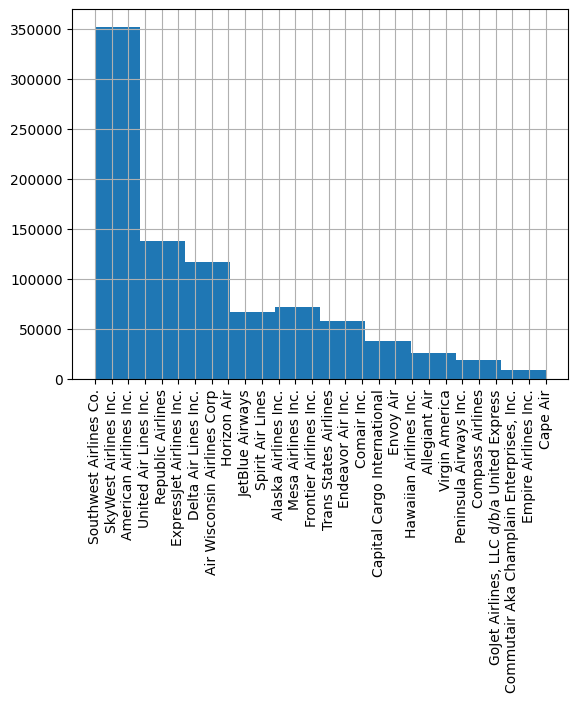

In [ ]:
df_2['Airline'].hist()
plt.xticks(rotation = 90)

In [ ]:
airlines = df_2['Airline'].unique().tolist() 

In [ ]:
df_airline = df_2[['Airline','Carrier_ID(DOT)']].dropna()

In [ ]:
d_airline = {airline: df_airline[df_airline['Airline'] == airline]['Carrier_ID(DOT)'].max() for airline in airlines} 
# Carrier_ID(DOT) 결측치가 없는 행을 대상으로 Airline에 대한 Carrier_ID(DOT)의 dictionary 생성

In [ ]:
print(d_airline)

{'Southwest Airlines Co.': 19393.0, 'SkyWest Airlines Inc.': 20304.0, 'American Airlines Inc.': 19805.0, 'United Air Lines Inc.': 19977.0, 'Republic Airlines': 20452.0, nan: nan, 'ExpressJet Airlines Inc.': 20366.0, 'Delta Air Lines Inc.': 19790.0, 'Air Wisconsin Airlines Corp': 20046.0, 'Horizon Air': 19687.0, 'JetBlue Airways': 20409.0, 'Spirit Air Lines': 20416.0, 'Alaska Airlines Inc.': 19930.0, 'Mesa Airlines Inc.': 20378.0, 'Frontier Airlines Inc.': 20436.0, 'Trans States Airlines': 20237.0, 'Endeavor Air Inc.': 20363.0, 'Comair Inc.': 20397.0, 'Capital Cargo International': 20427.0, 'Envoy Air': 20398.0, 'Hawaiian Airlines Inc.': 19690.0, 'Allegiant Air': 20368.0, 'Virgin America': 21171.0, 'Peninsula Airways Inc.': 20225.0, 'Compass Airlines': 21167.0, 'GoJet Airlines, LLC d/b/a United Express': 20500.0, 'Commutair Aka Champlain Enterprises, Inc.': 20445.0, 'Empire Airlines Inc.': 20263.0, 'Cape Air': 20253.0}


In [ ]:
df_2['Carrier_ID(DOT)'] = df_2['Airline'].apply(lambda x: d_airline[x]) # 생성한 dictionary를 기준으로 airport에 대응하는 state의 결측치를 채움

In [ ]:
df_2 = df_2.dropna(subset = 'Carrier_ID(DOT)') # 그럼에도 결측치가 존재하는 행은 drop

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891080 entries, 0 to 999998
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     891080 non-null  int64  
 1   Day_of_Month              891080 non-null  int64  
 2   Estimated_Departure_Time  793795 non-null  float64
 3   Estimated_Arrival_Time    793936 non-null  float64
 4   Origin_Airport_ID         891080 non-null  int64  
 5   Destination_Airport_ID    891080 non-null  int64  
 6   Distance                  891080 non-null  float64
 7   Airline                   891080 non-null  object 
 8   Carrier_Code(IATA)        793954 non-null  object 
 9   Carrier_ID(DOT)           891080 non-null  float64
 10  Tail_Number               891080 non-null  object 
 11  Delay                     227461 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 88.4+ MB


- Airline은 Carrier_ID(DOT)와 일대일대응되므로 drop
- Carrier_Code(IATA) 역시 Carrier_ID(DOT)로 대체할 수 있으므로 drop

In [ ]:
df_3 = df_2.drop(columns = ['Airline', 'Carrier_Code(IATA)']) 
df_3

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT),Tail_Number,Delay
0,4,15,NaN,NaN,13851,12191,419.0,19393.0,N7858A,NaN
1,8,15,740.0,1024.0,13930,14869,1250.0,20304.0,N125SY,NaN
2,9,6,1610.0,1805.0,11057,12953,544.0,19805.0,N103US,NaN
3,7,10,905.0,1735.0,12892,11618,2454.0,19977.0,N595UA,NaN
4,1,11,900.0,1019.0,14771,10157,250.0,20304.0,N161SY,NaN
...,...,...,...,...,...,...,...,...,...,...
999994,6,26,NaN,1800.0,11259,14771,1476.0,20304.0,N173SY,NaN
999995,9,18,936.0,1243.0,13930,14100,678.0,19977.0,N477UA,NaN
999996,5,30,920.0,1028.0,11637,13487,223.0,20304.0,N439SW,NaN
999997,6,28,800.0,1340.0,13796,12191,1642.0,19393.0,N230WN,NaN


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891080 entries, 0 to 999998
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     891080 non-null  int64  
 1   Day_of_Month              891080 non-null  int64  
 2   Estimated_Departure_Time  793795 non-null  float64
 3   Estimated_Arrival_Time    793936 non-null  float64
 4   Origin_Airport_ID         891080 non-null  int64  
 5   Destination_Airport_ID    891080 non-null  int64  
 6   Distance                  891080 non-null  float64
 7   Carrier_ID(DOT)           891080 non-null  float64
 8   Tail_Number               891080 non-null  object 
 9   Delay                     227461 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 74.8+ MB


###3. Estimated_Departure_Time, Estimated_Arrival_Time
- 시간적인 특수한 요소라 최빈값이나 평균값으로 채우기 쉽지 않아보임

In [ ]:
df_3[df_3['Estimated_Arrival_Time'].isna() == True][['Estimated_Departure_Time', 'Estimated_Arrival_Time']]

,Estimated_Departure_Time,Estimated_Arrival_Time
0,NaN,NaN
5,1545.0,NaN
20,620.0,NaN
24,1030.0,NaN
28,930.0,NaN
...,...,...
999927,1947.0,NaN
999932,2110.0,NaN
999946,1925.0,NaN
999965,1555.0,NaN


In [ ]:
df_3[df_3['Estimated_Departure_Time'].isna() == True][['Estimated_Departure_Time', 'Estimated_Arrival_Time']]

,Estimated_Departure_Time,Estimated_Arrival_Time
0,NaN,NaN
25,NaN,2020.0
74,NaN,749.0
102,NaN,2139.0
109,NaN,NaN
...,...,...
999962,NaN,2003.0
999974,NaN,859.0
999977,NaN,2310.0
999990,NaN,751.0


In [ ]:
df_4 = df_3.dropna(subset = ['Estimated_Departure_Time', 'Estimated_Arrival_Time'])
df_4

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT),Tail_Number,Delay
1,8,15,740.0,1024.0,13930,14869,1250.0,20304.0,N125SY,NaN
2,9,6,1610.0,1805.0,11057,12953,544.0,19805.0,N103US,NaN
3,7,10,905.0,1735.0,12892,11618,2454.0,19977.0,N595UA,NaN
4,1,11,900.0,1019.0,14771,10157,250.0,20304.0,N161SY,NaN
6,1,20,1742.0,1903.0,11618,10721,200.0,19977.0,N66825,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...
999992,12,30,1307.0,1707.0,12441,13930,1162.0,19977.0,N17719,Not_Delayed
999995,9,18,936.0,1243.0,13930,14100,678.0,19977.0,N477UA,NaN
999996,5,30,920.0,1028.0,11637,13487,223.0,20304.0,N439SW,NaN
999997,6,28,800.0,1340.0,13796,12191,1642.0,19393.0,N230WN,NaN


- 총 결측치는 약 21만개 정도
- 각각이 결측치인 행과 둘다 결측치인 행이 복합적으로 존재

In [ ]:
df_4 = df_3.dropna(subset = ['Estimated_Departure_Time', 'Estimated_Arrival_Time'], how = 'all')
df_4

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT),Tail_Number,Delay
1,8,15,740.0,1024.0,13930,14869,1250.0,20304.0,N125SY,NaN
2,9,6,1610.0,1805.0,11057,12953,544.0,19805.0,N103US,NaN
3,7,10,905.0,1735.0,12892,11618,2454.0,19977.0,N595UA,NaN
4,1,11,900.0,1019.0,14771,10157,250.0,20304.0,N161SY,NaN
5,4,13,1545.0,NaN,11618,11278,199.0,20452.0,N657RW,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...
999994,6,26,NaN,1800.0,11259,14771,1476.0,20304.0,N173SY,NaN
999995,9,18,936.0,1243.0,13930,14100,678.0,19977.0,N477UA,NaN
999996,5,30,920.0,1028.0,11637,13487,223.0,20304.0,N439SW,NaN
999997,6,28,800.0,1340.0,13796,12191,1642.0,19393.0,N230WN,NaN


In [ ]:
print(df_3.shape)
print(df_4.shape)

(891080, 10)
(880672, 10)


- Estimated_Departure_Time과 Estimated_Arrival_Time 모두에 결측치가 존재하는 행은 삭제
- 총 891080개 중 10408개가 삭제됨

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880672 entries, 1 to 999998
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     880672 non-null  int64  
 1   Day_of_Month              880672 non-null  int64  
 2   Estimated_Departure_Time  793795 non-null  float64
 3   Estimated_Arrival_Time    793936 non-null  float64
 4   Origin_Airport_ID         880672 non-null  int64  
 5   Destination_Airport_ID    880672 non-null  int64  
 6   Distance                  880672 non-null  float64
 7   Carrier_ID(DOT)           880672 non-null  float64
 8   Tail_Number               880672 non-null  object 
 9   Delay                     224762 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 73.9+ MB


- Estimated_Departure_Time과 Estimated_Arrival_Time 모두에 결측치가 존재하는 행은 이제 존재하지 않음
- Estimated_Departure_Time : Estimated_Arrival_Time과 Origin_Airport_ID로 추측 가능
- Estimated_Arrival_Time : Estimated_Departure_Time과 Destination_Airport_ID로 추측 가능


In [ ]:
df_unlabel = df_4[df_4['Delay'].isna() == True]

In [ ]:
df_label = df_4[df_4['Delay'].isna() == False]
df_delay = df_label[df_label['Delay'] == 'Delayed']
df_not_delay = df_label[df_label['Delay'] == 'Not_Delayed']

print('df_delay.shape :', df_delay.shape)
print('df_not_delay.shape :', df_not_delay.shape)

df_delay.shape : (39712, 10)
df_not_delay.shape : (185050, 10)


- delay의 여부에 따라서 비행시간도 달라질 것이므로
- delay 여부에 따라 각각 결측치 처리 진행

#### Delayed

##### departure_time

In [ ]:
df_delay['Estimated_Departure_Time'].isna().sum()

3952

In [ ]:
arrivals = df_delay['Estimated_Arrival_Time'].dropna().unique().tolist() 

In [ ]:
print(arrivals)

[1844.0, 1900.0, 2159.0, 2115.0, 2249.0, 2002.0, 5.0, 1135.0, 2145.0, 2154.0, 1820.0, 1015.0, 1850.0, 1556.0, 1241.0, 1540.0, 950.0, 1037.0, 1715.0, 1059.0, 1307.0, 751.0, 2000.0, 2225.0, 1226.0, 1954.0, 944.0, 1756.0, 1149.0, 1557.0, 1811.0, 2012.0, 1921.0, 2015.0, 1655.0, 1519.0, 1421.0, 1552.0, 1355.0, 1708.0, 2320.0, 1345.0, 1925.0, 2331.0, 2229.0, 2109.0, 1734.0, 1340.0, 2305.0, 1125.0, 1335.0, 1700.0, 1634.0, 2103.0, 2323.0, 2349.0, 1040.0, 1710.0, 1235.0, 2030.0, 1338.0, 1232.0, 1530.0, 1110.0, 1827.0, 1605.0, 2125.0, 1635.0, 1233.0, 1615.0, 1711.0, 558.0, 1305.0, 1652.0, 1720.0, 1005.0, 1429.0, 1320.0, 1210.0, 738.0, 2128.0, 2144.0, 1514.0, 1826.0, 1905.0, 1821.0, 1644.0, 1819.0, 1617.0, 1442.0, 820.0, 1236.0, 1729.0, 2333.0, 909.0, 2010.0, 1420.0, 1045.0, 1702.0, 906.0, 2134.0, 1044.0, 1727.0, 1625.0, 1500.0, 1935.0, 1253.0, 1237.0, 2139.0, 1354.0, 2230.0, 659.0, 518.0, 1337.0, 1229.0, 1245.0, 2054.0, 2344.0, 806.0, 1325.0, 1344.0, 2105.0, 1323.0, 2318.0, 1336.0, 1550.0, 1212.

In [ ]:
df_arrival = df_delay[['Estimated_Departure_Time', 'Estimated_Arrival_Time']].dropna()

In [ ]:
d_arrival = {arrival : df_arrival[df_arrival['Estimated_Arrival_Time'] == arrival]['Estimated_Departure_Time'].max() for arrival in arrivals}

In [ ]:
print(d_arrival)

{1844.0: 1750.0, 1900.0: 1855.0, 2159.0: 2100.0, 2115.0: 2117.0, 2249.0: 2209.0, 2002.0: 1920.0, 5.0: 2315.0, 1135.0: 1110.0, 2145.0: 2112.0, 2154.0: 2131.0, 1820.0: 1815.0, 1015.0: 945.0, 1850.0: 1837.0, 1556.0: 1515.0, 1241.0: 1118.0, 1540.0: 1525.0, 950.0: 915.0, 1037.0: 945.0, 1715.0: 1705.0, 1059.0: 1031.0, 1307.0: 1155.0, 751.0: 708.0, 2000.0: 1950.0, 2225.0: 2155.0, 1226.0: 1130.0, 1954.0: 1850.0, 944.0: 854.0, 1756.0: 1702.0, 1149.0: 1114.0, 1557.0: 1548.0, 1811.0: 1752.0, 2012.0: 1940.0, 1921.0: 1834.0, 2015.0: 2000.0, 1655.0: 1649.0, 1519.0: 1500.0, 1421.0: 1328.0, 1552.0: 1537.0, 1355.0: 1330.0, 1708.0: 1627.0, 2320.0: 2222.0, 1345.0: 1325.0, 1925.0: 1910.0, 2331.0: 2204.0, 2229.0: 2153.0, 2109.0: 2106.0, 1734.0: 1704.0, 1340.0: 1340.0, 2305.0: 2230.0, 1125.0: 1055.0, 1335.0: 1300.0, 1700.0: 1658.0, 1634.0: 1555.0, 2103.0: 2029.0, 2323.0: 2225.0, 2349.0: 2250.0, 1040.0: 1025.0, 1710.0: 1656.0, 1235.0: 1220.0, 2030.0: 2000.0, 1338.0: 1305.0, 1232.0: 1137.0, 1530.0: 1455.0, 11

In [ ]:
arrivals_ = list(d_arrival.keys())

In [ ]:
for idx in range(len(df_delay)) :
  if df_delay['Estimated_Arrival_Time'].iloc[idx] in arrivals_:
    df_delay['Estimated_Departure_Time'].iloc[idx] = d_arrival[df_delay['Estimated_Arrival_Time'].iloc[idx]]

<ipython-input-47-3445ab958f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['Estimated_Departure_Time'].iloc[idx] = d_arrival[df_delay['Estimated_Arrival_Time'].iloc[idx]]


In [ ]:
df_delay['Estimated_Departure_Time'].isna().sum()

12

- 3952개의 결측치 중 12개를 제외하고 모두 채워짐

##### arrival_time

In [ ]:
df_delay['Estimated_Arrival_Time'].isna().sum()

3884

In [ ]:
departures = df_delay['Estimated_Departure_Time'].dropna().unique().tolist() 
df_departure = df_delay[['Estimated_Departure_Time', 'Estimated_Arrival_Time']].dropna()
d_departure = {departure : df_departure[df_departure['Estimated_Departure_Time'] == departure]['Estimated_Arrival_Time'].max() for departure in departures}

In [ ]:
departures_ = list(d_departure.keys())

for idx in range(len(df_delay)) :
  if df_delay['Estimated_Departure_Time'].iloc[idx] in departures_:
    df_delay['Estimated_Arrival_Time'].iloc[idx] = d_departure[df_delay['Estimated_Departure_Time'].iloc[idx]]

<ipython-input-51-479534db6aa9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['Estimated_Arrival_Time'].iloc[idx] = d_departure[df_delay['Estimated_Departure_Time'].iloc[idx]]


In [ ]:
df_delay['Estimated_Arrival_Time'].isna().sum()

867

- 3884개 중 867개를 제외하고 모두 결측치가 채워짐

In [ ]:
df_delay_ = df_delay.dropna(subset = ['Estimated_Departure_Time', 'Estimated_Arrival_Time']) # 채워지지 않은 행은 이제 drop

#### Not Delayed 

##### departure_time

In [ ]:
df_not_delay['Estimated_Departure_Time'].isna().sum()

18272

In [ ]:
arrivals = df_not_delay['Estimated_Arrival_Time'].dropna().unique().tolist() 
df_arrival = df_not_delay[['Estimated_Departure_Time', 'Estimated_Arrival_Time']].dropna()
d_arrival = {arrival : df_arrival[df_arrival['Estimated_Arrival_Time'] == arrival]['Estimated_Departure_Time'].max() for arrival in arrivals}

arrivals_ = list(d_arrival.keys())

for idx in range(len(df_not_delay)) :
  if df_not_delay['Estimated_Arrival_Time'].iloc[idx] in arrivals_:
    df_not_delay['Estimated_Departure_Time'].iloc[idx] = d_arrival[df_not_delay['Estimated_Arrival_Time'].iloc[idx]]

<ipython-input-55-760585926f87>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_delay['Estimated_Departure_Time'].iloc[idx] = d_arrival[df_not_delay['Estimated_Arrival_Time'].iloc[idx]]


In [ ]:
df_not_delay['Estimated_Departure_Time'].isna().sum()

6

- 18272개 중 6개를 제외하고 모두 결측치가 채워짐

##### arrival_time

In [ ]:
df_not_delay['Estimated_Arrival_Time'].isna().sum()

18112

In [ ]:
departures = df_not_delay['Estimated_Departure_Time'].dropna().unique().tolist() 
df_departure = df_not_delay[['Estimated_Departure_Time', 'Estimated_Arrival_Time']].dropna()
d_departure = {departure : df_departure[df_departure['Estimated_Departure_Time'] == departure]['Estimated_Arrival_Time'].max() for departure in departures}

departures_ = list(d_departure.keys())

for idx in range(len(df_not_delay)) :
  if df_not_delay['Estimated_Departure_Time'].iloc[idx] in departures_:
    df_not_delay['Estimated_Arrival_Time'].iloc[idx] = d_departure[df_not_delay['Estimated_Departure_Time'].iloc[idx]]

<ipython-input-58-6339dd60a4e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_delay['Estimated_Arrival_Time'].iloc[idx] = d_departure[df_not_delay['Estimated_Departure_Time'].iloc[idx]]


In [ ]:
df_not_delay['Estimated_Arrival_Time'].isna().sum()

6840

- 18112 개중 6840개를 제외하고 모두 결측치가 채워짐

In [ ]:
df_not_delay_ = df_not_delay.dropna(subset = ['Estimated_Departure_Time', 'Estimated_Arrival_Time'])

In [ ]:
df_label_ = pd.concat([df_delay_, df_not_delay_], axis = 0)
df_5 = pd.concat([df_label_, df_unlabel], axis = 0)

## 최종 데이터

In [ ]:
df_final = df_5.dropna(subset = ['Estimated_Departure_Time', 'Estimated_Arrival_Time'])
df_final

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT),Tail_Number,Delay
10,8,13,1750.0,1852.0,11278,14122,204.0,20452.0,N119HQ,Delayed
55,8,18,1855.0,2006.0,12191,10693,670.0,19393.0,N8658A,Delayed
95,3,14,2100.0,2214.0,14027,12953,1035.0,20409.0,N337JB,Delayed
118,4,11,2117.0,2115.0,10397,13487,907.0,19790.0,N912DU,Delayed
162,12,16,2209.0,2249.0,14747,14831,696.0,19930.0,N551AS,Delayed
...,...,...,...,...,...,...,...,...,...,...
999991,8,9,1720.0,1838.0,12264,12397,250.0,20445.0,N14173,NaN
999995,9,18,936.0,1243.0,13930,14100,678.0,19977.0,N477UA,NaN
999996,5,30,920.0,1028.0,11637,13487,223.0,20304.0,N439SW,NaN
999997,6,28,800.0,1340.0,13796,12191,1642.0,19393.0,N230WN,NaN


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743554 entries, 10 to 999998
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     743554 non-null  int64  
 1   Day_of_Month              743554 non-null  int64  
 2   Estimated_Departure_Time  743554 non-null  float64
 3   Estimated_Arrival_Time    743554 non-null  float64
 4   Origin_Airport_ID         743554 non-null  int64  
 5   Destination_Airport_ID    743554 non-null  int64  
 6   Distance                  743554 non-null  float64
 7   Carrier_ID(DOT)           743554 non-null  float64
 8   Tail_Number               743554 non-null  object 
 9   Delay                     217037 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 62.4+ MB


## EDA

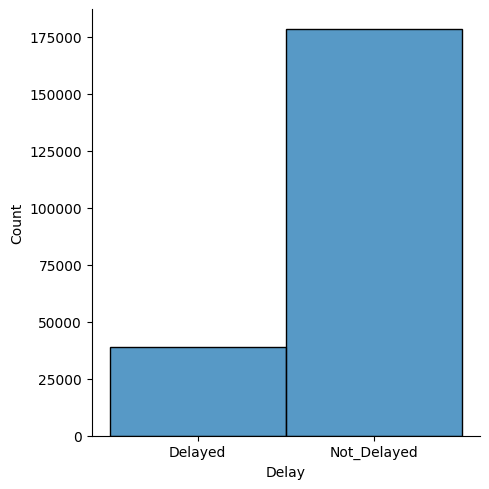

In [ ]:
train_target = df_final['Delay']
sns.displot(train_target)

In [ ]:
df_final['Delay'] = df_final['Delay'].map({'Delayed': 0, 'Not_Delayed': 1}) # target을 0과 1로 mapping

<ipython-input-65-33976a8f8218>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Delay'] = df_final['Delay'].map({'Delayed': 0, 'Not_Delayed': 1}) # target을 0과 1로 mapping


In [ ]:
df_final.columns

Index(['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport_ID', 'Destination_Airport_ID',
       'Distance', 'Carrier_ID(DOT)', 'Tail_Number', 'Delay'],
      dtype='object')

In [ ]:
cate_cols = df_final['Tail_Number']
numeric_cols = df_final[['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport_ID', 'Destination_Airport_ID',
       'Distance', 'Carrier_ID(DOT)']]

In [ ]:
# 범주형 변수 labeling
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le =le.fit(df_final['Tail_Number']) 
df_final['Tail_Number'] = le.transform(df_final['Tail_Number']) 

<ipython-input-68-ca9065a1afd9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Tail_Number'] = le.transform(df_final['Tail_Number'])


### 변수별 분포 확인

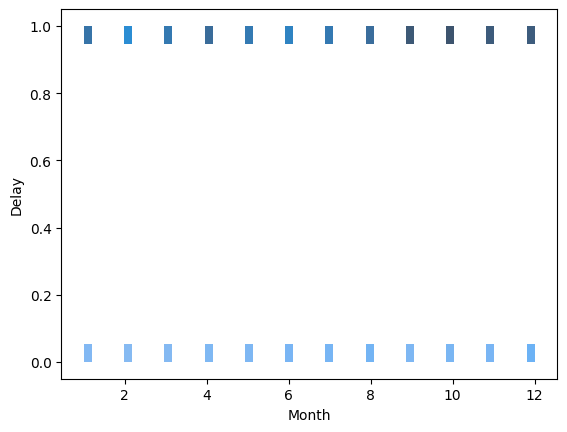

In [ ]:
sns.histplot(x = 'Month', y = 'Delay', data = df_final)
plt.show()

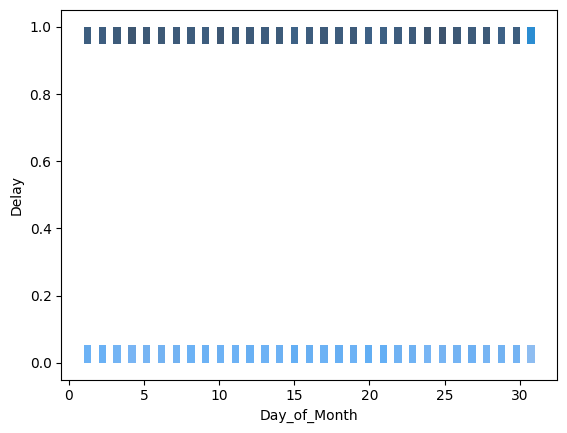

In [ ]:
sns.histplot(x = 'Day_of_Month', y = 'Delay', data = df_final)
plt.show()

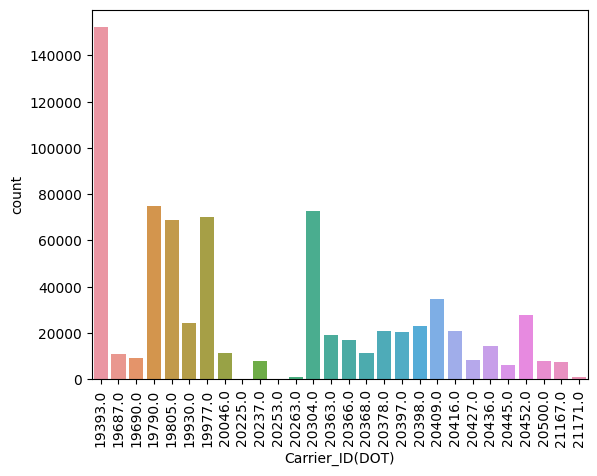

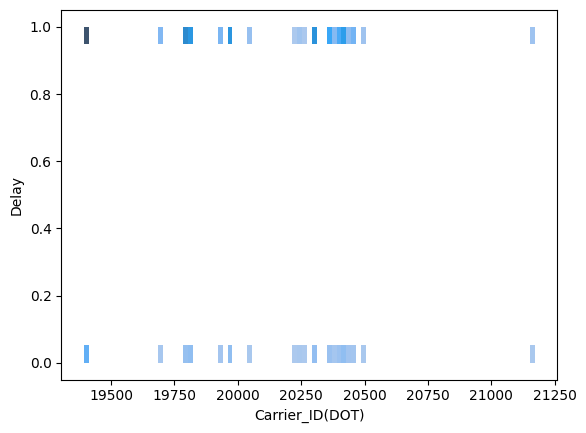

In [ ]:
sns.countplot(x = 'Carrier_ID(DOT)', data = df_final)
plt.xticks(rotation = 90)
plt.show()

sns.histplot(x = 'Carrier_ID(DOT)', y = 'Delay', data = df_final)
plt.show()

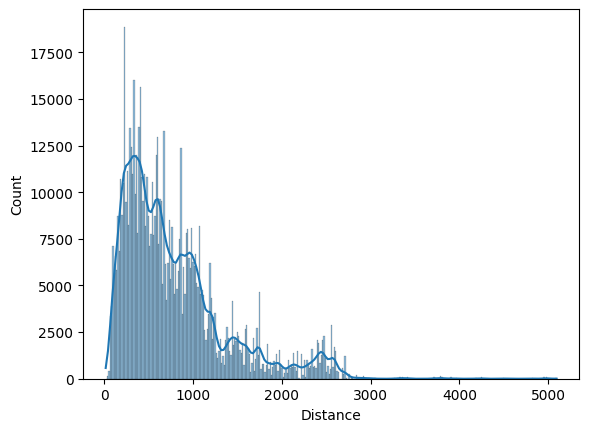

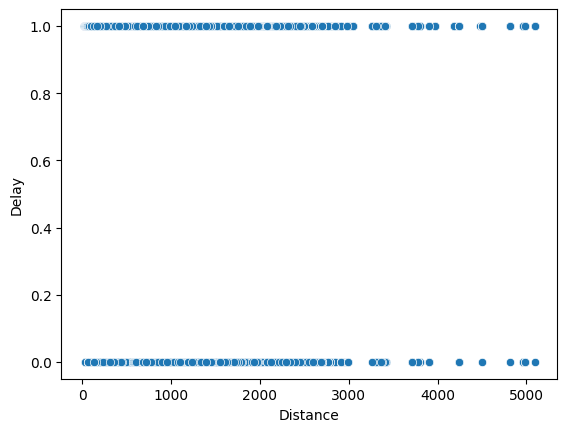

In [ ]:
sns.histplot(df_final['Distance'], kde = True)
plt.show()

sns.scatterplot(x = 'Distance', y = 'Delay', data = df_final)
plt.show()

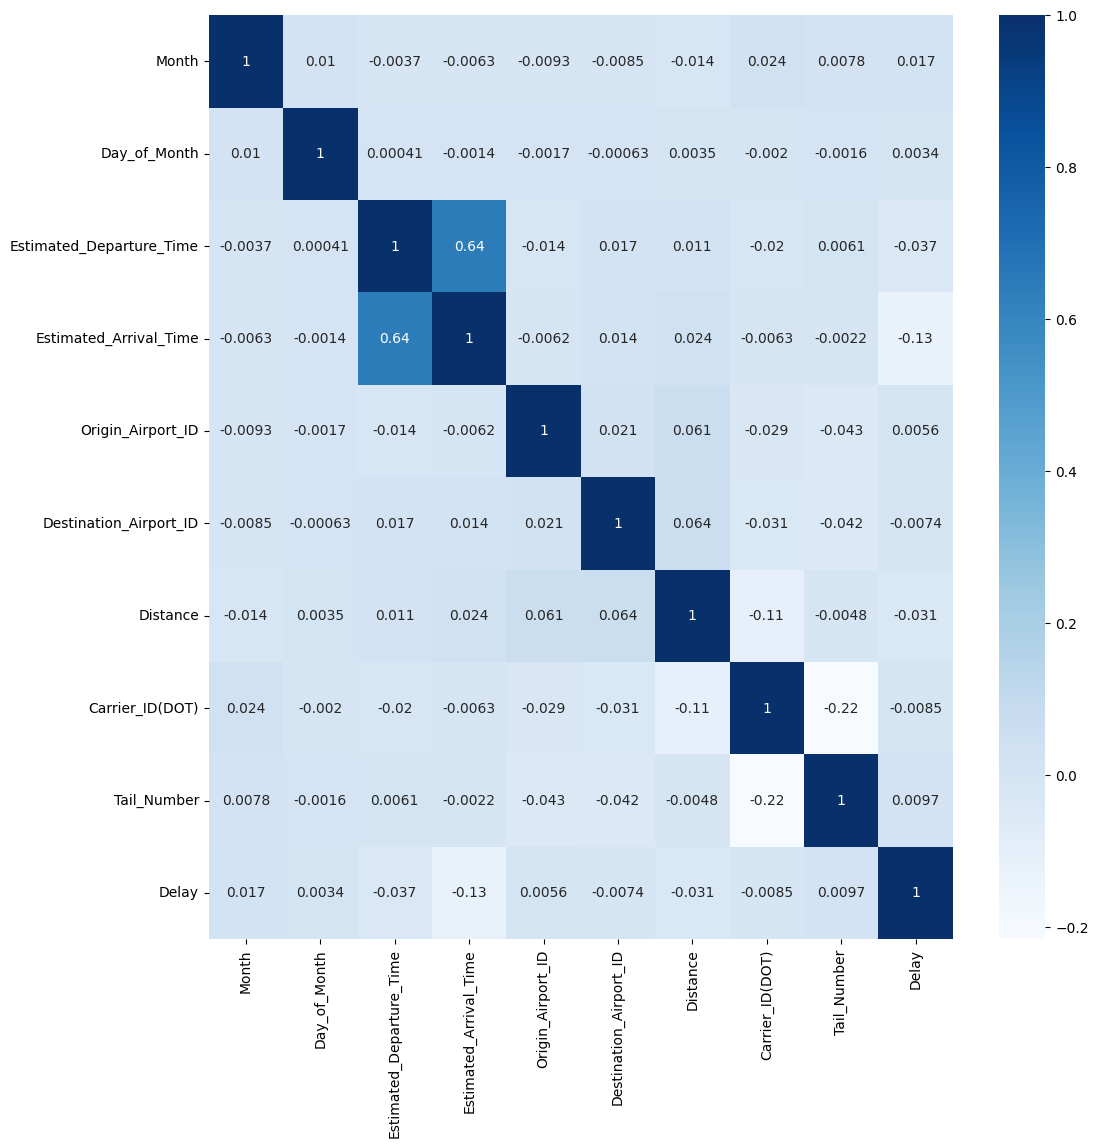

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(df_final.corr(), annot = True, cmap = 'Blues')
plt.show()

- Estimated_Departure_Time과 Estimated_Arrival_Time간의 상관관계 존재


### 정규성 검정

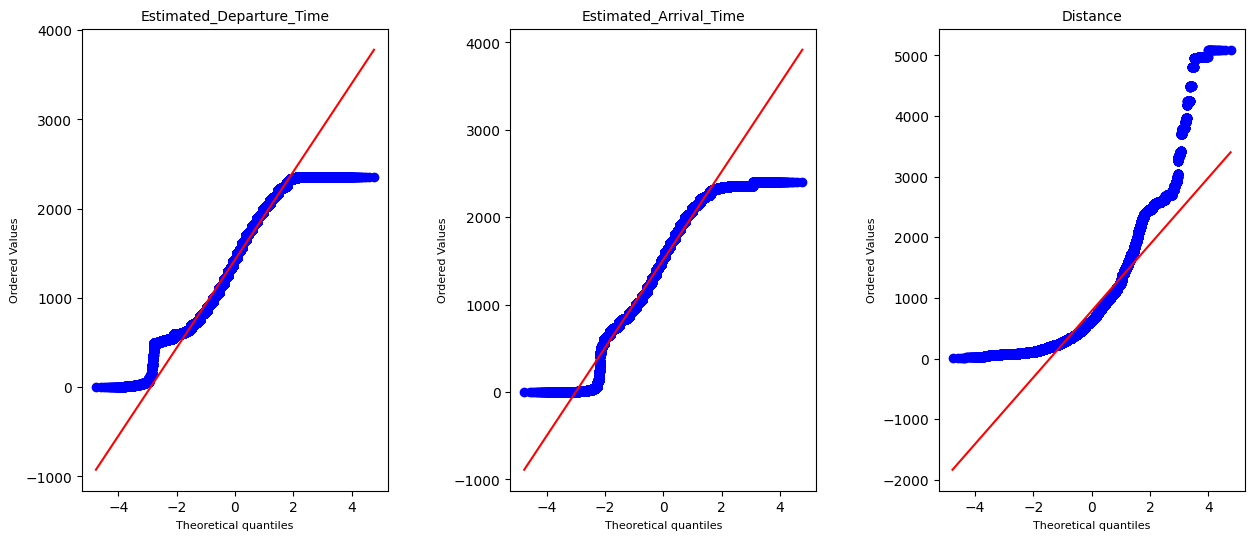

In [ ]:
# qqplot
from scipy import stats
from scipy.stats import probplot
from matplotlib.gridspec import GridSpec

grid = GridSpec(1, 3)
plt.figure(figsize = (15, 6))
plt.subplots_adjust(wspace = 0.4)
features = ['Estimated_Departure_Time','Estimated_Arrival_Time', 'Distance']

for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    stats.probplot(df_final[feature], dist = stats.norm, plot = ax)
    ax.set_title(f'{feature}', fontsize = 10)
    plt.xlabel('Theoretical quantiles', size = 8)
    plt.ylabel('Ordered Values', size = 8)

In [ ]:
from scipy.stats import shapiro

features = ['Estimated_Departure_Time','Estimated_Arrival_Time', 'Distance']

# Shapiro-Wilk test
for feature in features:
    stat, p_value = shapiro(df[feature])
    print(f'[shapiro] variable : {feature}, statistics : {stat}, p-value : {p_value}')

[shapiro] variable : Estimated_Departure_Time, statistics : nan, p-value : 1.0
[shapiro] variable : Estimated_Arrival_Time, statistics : nan, p-value : 1.0
[shapiro] variable : Distance, statistics : 0.8647534847259521, p-value : 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## modeling

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from xgboost import XGBClassifier

In [ ]:
train = df_final.dropna()

In [ ]:
train_input = train.drop(columns = ['Delay'])
train_target = train['Delay']

### GridSearchCV
- 직접 모델의 하이퍼 파라미터의 값을 리스트로 입력하면 
- 값에 대한 경우의 수마다 예측 성능을 측정 평가하여 비교하면서 
- 최적의 하이퍼 파라미터 값을 찾는 과정을 진행
- 시간이 오래걸린다는 단점

In [ ]:
#train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42) 

In [ ]:
# Normalize numerical features
# ss = StandardScaler()
# train_scaled = ss.fit_transform(train_input)
# val_scaled = ss.transform(val_input)

In [ ]:
# Cross-validation with StratifiedKFold
# cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [ ]:
# Model and hyperparameter tuning using GridSearchCV
# model = XGBClassifier(random_state = 42)

In [ ]:
# param_grid = {
#    'learning_rate': [0.01, 0.1],
#    'max_depth': range(5, 9),
#    'n_estimators': [200, 400, 600, 800],
# }

In [ ]:
# grid = GridSearchCV(model,
#                     param_grid,
#                     cv=cv,
#                     scoring='accuracy',
#                     n_jobs=-1,
#                     verbose=1)

# grid.fit(train_input, train_target)

# best_model = grid.best_estimator_

In [97]:
train = df_final.dropna()

train_input = train.drop(columns = 'Delay')
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)

train_target = np.array(train['Delay'])

In [98]:
cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
model = XGBClassifier()

features = train_scaled
label = train_target

n_iters = 0

for train_idx, test_idx in kfold.split(features):
  train_input, test_input = features[train_idx], features[test_idx]
  train_target, test_target = label[train_idx], label[test_idx]

  model.fit(train_input, train_target) # 모델 적합
  preds = model.predict(test_input) # 예측값

  n_iters += 1
  accuracy = np.round(accuracy_score(test_target, preds),4) 
  precision = np.round(precision_score(test_target, preds),4)
  recall = np.round(recall_score(test_target, preds),4)
  f1 = np.round(metrics.f1_score(test_target, preds),4) # 각 지표 값들을 4자리까지 구함
  print('\n{} 교차검증정확도 : {}, 교차검증 precision {}, 교차검증 recall {}, 교차검증 f1 {}'.format(n_iters, accuracy, precision, recall, f1))
  # f1_score 그대로 import 해오면 error 남
  # metrics 까지 import하고 metrics의 하위 객체로 함수 사용

  cv_accuracy.append(accuracy) 
  cv_precision.append(precision)
  cv_recall.append(recall)
  cv_f1.append(f1) # 각 지표값들 해당되는 리스트에 저장


1 교차검증정확도 : 0.9927, 교차검증 precision 0.9912, 교차검증 recall 0.9999, 교차검증 f1 0.9955

2 교차검증정확도 : 0.9912, 교차검증 precision 0.9898, 교차검증 recall 0.9997, 교차검증 f1 0.9947

3 교차검증정확도 : 0.9899, 교차검증 precision 0.988, 교차검증 recall 0.9998, 교차검증 f1 0.9939

4 교차검증정확도 : 0.991, 교차검증 precision 0.9892, 교차검증 recall 0.9999, 교차검증 f1 0.9945

5 교차검증정확도 : 0.991, 교차검증 precision 0.9894, 교차검증 recall 0.9997, 교차검증 f1 0.9946


In [ ]:
cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
model = XGBClassifier(booster = 'gbtree',
                      learning_rate = 0.01,
                      objective = 'binary:logistic',
                      n_estimators = 818, 
                      max_depth = 3,
                     )

features = train_scaled
label = train_target

n_iters = 0

for train_idx, test_idx in kfold.split(features):
  train_input, test_input = features[train_idx], features[test_idx]
  train_target, test_target = label[train_idx], label[test_idx]

  model.fit(train_input, train_target) # 모델 적합
  preds = model.predict(test_input) # 예측값

  n_iters += 1
  accuracy = np.round(accuracy_score(test_target, preds),4) 
  precision = np.round(precision_score(test_target, preds),4)
  recall = np.round(recall_score(test_target, preds),4)
  f1 = np.round(metrics.f1_score(test_target, preds),4) # 각 지표 값들을 4자리까지 구함
  print('\n{} 교차검증정확도 : {}, 교차검증 precision {}, 교차검증 recall {}, 교차검증 f1 {}'.format(n_iters, accuracy, precision, recall, f1))
  # f1_score 그대로 import 해오면 error 남
  # metrics 까지 import하고 metrics의 하위 객체로 함수 사용

  cv_accuracy.append(accuracy) 
  cv_precision.append(precision)
  cv_recall.append(recall)
  cv_f1.append(f1) # 각 지표값들 해당되는 리스트에 저장


1 교차검증정확도 : 0.8562, 교차검증 precision 0.8514, 교차검증 recall 0.9995, 교차검증 f1 0.9195

2 교차검증정확도 : 0.8598, 교차검증 precision 0.8545, 교차검증 recall 0.9997, 교차검증 f1 0.9214

3 교차검증정확도 : 0.8556, 교차검증 precision 0.8507, 교차검증 recall 0.9997, 교차검증 f1 0.9192

4 교차검증정확도 : 0.8533, 교차검증 precision 0.8487, 교차검증 recall 0.9994, 교차검증 f1 0.9179

5 교차검증정확도 : 0.853, 교차검증 precision 0.8481, 교차검증 recall 0.9996, 교차검증 f1 0.9177


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

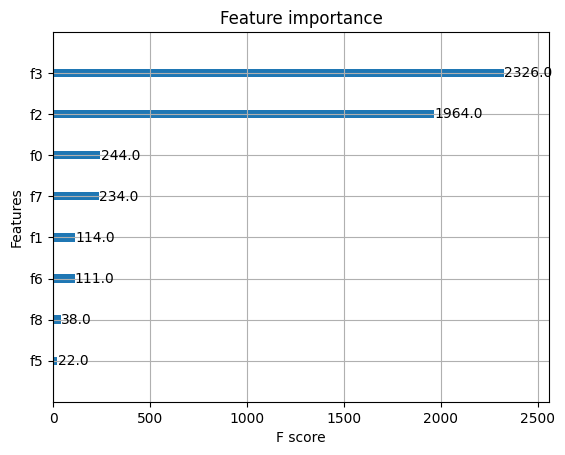

In [ ]:
from xgboost import plot_importance

plot_importance(model)

### 간단한 하이퍼파라미터 정리

In [ ]:
model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=818, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

- booster: tree 기반 모델 / 선형 모델
- object: 목적함수 종류
 - binary:logistic(이진 분류)
 - multi:softmax(다중 분류)
 - multi-softprob(다중 확률)
- learning_rate : 학습률
- n_estimators : 학습기의 개수 (반복 수행 횟수)
- min_child_weight : leaf와 유사, 과적합 조절용
- max_depth : 트리의 최대 깊이
- subsample : 샘플링하는 비율
- early_stopping_rounds : 더 이상 비용 평가 지표가 감소하지 않는 최대 반복 횟수 (조기 중단 가능)
- eval_metric : 반복 수행 시 사용하는 비용 평가 지표
 - rmse : root mean square error
 - mae : mean absolute error
 - logloss : negative log-likelihood
 - error : Binary classification error rate (0.5 threshold)
 - merror : Multiclass classification error rate
 - mlogloss : Multiclass logloss
 - auc: Area under the curve
- eval_set : 평가를 수행하느 별도의 검증 데이터 세트, 일반적으로 검증 데이터 세트에서 반복적으로 비용 감소 성능 평가

## 고찰
1. 준지도학습의 사용 - 준지도학습에 대한 공부를 진행하여 적용해보기
2. distance의 로그변환 - 모두 standardscaler를 사용했지만 앞선 그래프에서 skew 되어 있는 것을 발견
3. gridsearchcv 사용 - gridsearchcv를 사용하여 모델 최적의 하이퍼파라미터 찾아보기
4. 시계열적 요소 찾아보기